In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

rows, columns = df.shape

print(f'Количество строк: {rows}')
print(f'Количество колонок: {columns}')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Количество строк: 517
Количество колонок: 13


In [6]:
# Просмотр первых строк датасета
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [11]:
vals = df["month"].unique()
vals

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [12]:
vals = df["day"].unique()
vals

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Создание копии исходного DataFrame
df = df.copy()

# Кодирование категориальных столбцов 'month' и 'day'
month_encoder = LabelEncoder()
df['month'] = month_encoder.fit_transform(df['month'])

day_encoder = LabelEncoder()
df['day'] = day_encoder.fit_transform(df['day'])

# Определение целевой переменной 'area' (если 'area' категориальная, заменим на числовые)
# В этом примере предполагаем, что 'area' может быть категориальной переменной, в таком случае заменим её на числа
# Если 'area' числовая, то этот шаг можно пропустить
area_encoder = LabelEncoder()
df['area'] = area_encoder.fit_transform(df['area'])

# Теперь разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['area'])  # Убираем целевой столбец 'area'
y = df['area']  # Целевая переменная - 'area'

# Проверим результат
print(X.head())  # Признаки
print(y.head())  # Целевая переменная


   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain
0  7  5      7    0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  7  4     10    5  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  7  4     10    2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3  8  6      7    0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4  8  6      7    3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0
0    0
1    0
2    0
3    0
4    0
Name: area, dtype: int64


Столбцы month и day успешно были преобразованы в числовые значения с помощью LabelEncoder.
Целевая переменная area также была преобразована в числовые значения.
X — это DataFrame, содержащий признаки (все столбцы, кроме area).
y — это целевая переменная area, которая теперь закодирована числовыми значениями.

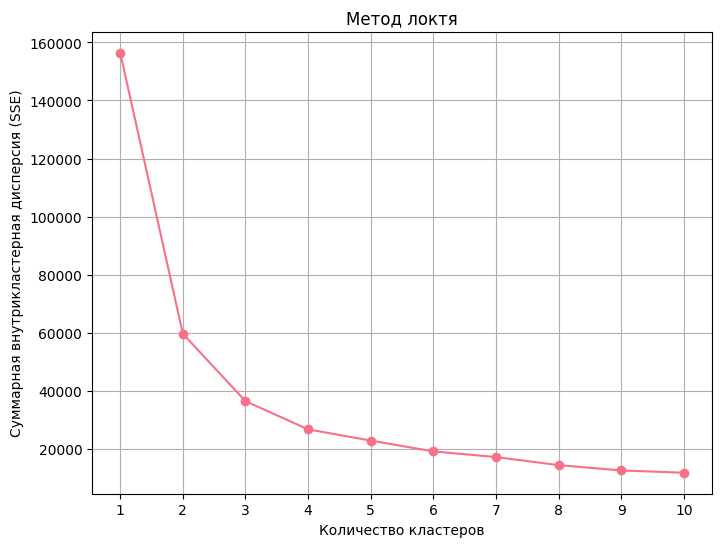

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Используем признаки для кластеризации
X = df[["temp", "RH", "wind"]]

# Список для хранения значений SSE для разных количеств кластеров
sse = []

# Проверяем количество кластеров от 1 до 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ — это SSE для модели

# Строим график метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker="o")
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Суммарная внутрикластерная дисперсия (SSE)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


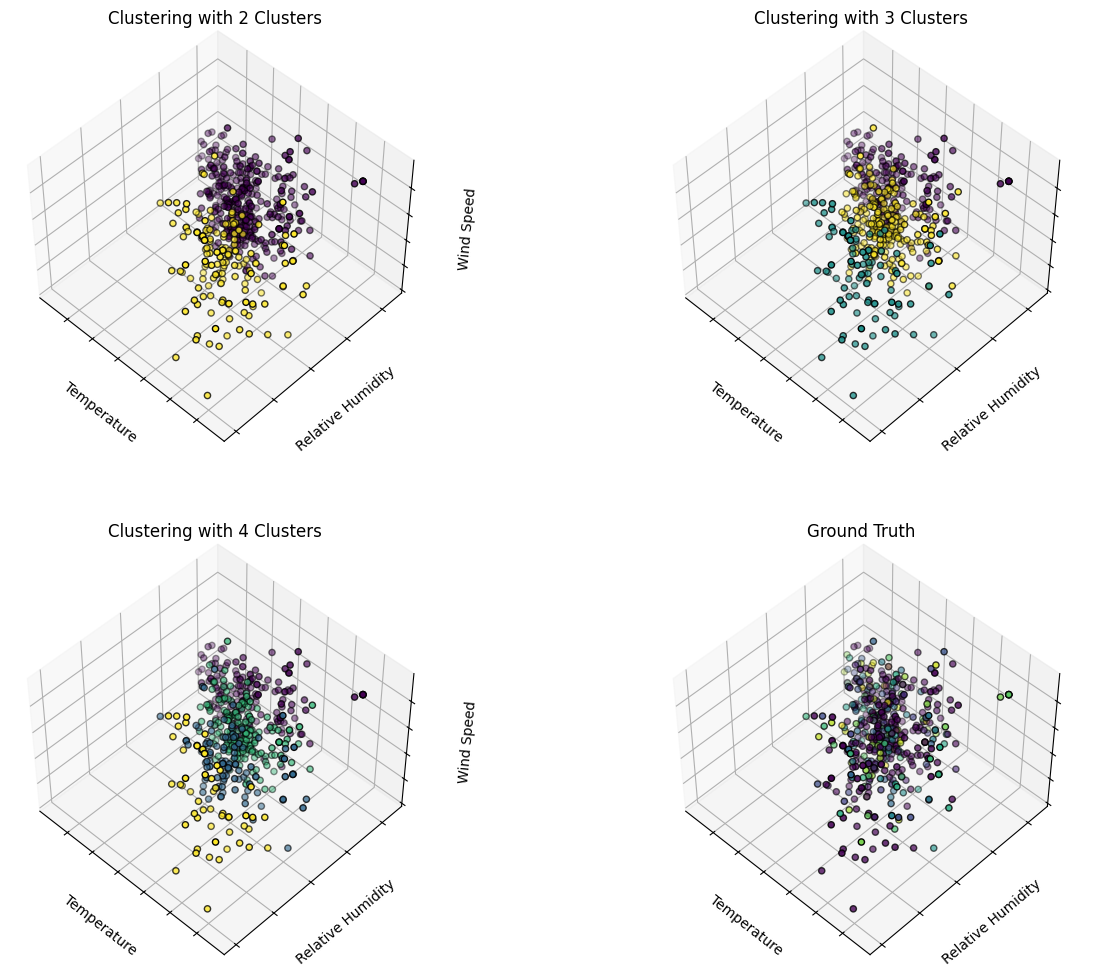

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Используем числовые столбцы для кластеризации
X = df[["temp", "RH", "wind"]]  # Пример с использованием нескольких числовых признаков

# Список различных моделей с разным количеством кластеров
estimators = [
    ("k_means_2", KMeans(n_clusters=2, random_state=42)),
    ("k_means_3", KMeans(n_clusters=3, random_state=42)),
    ("k_means_4", KMeans(n_clusters=4, random_state=42)),
]

fig = plt.figure(figsize=(15, 12))

# Модели кластеризации
for idx, (name, est) in enumerate(estimators):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["temp"], X["RH"], X["wind"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Temperature")
    ax.set_ylabel("Relative Humidity")
    ax.set_zlabel("Wind Speed")
    ax.set_title(f"Clustering with {name.split('_')[2]} Clusters")

# Плотим ground truth (если целевая переменная есть)
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

# Для примера ground truth (предположим, что target 'area' есть)
# Здесь вы можете заменить 'y' на вашу целевую переменную для ground truth
y = df['area']  # Используем колонку 'area' как целевую переменную

ax.scatter(X["temp"], X["RH"], X["wind"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Temperature")
ax.set_ylabel("Relative Humidity")
ax.set_zlabel("Wind Speed")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()


Silhouette Score for 2 clusters: 0.5453
Silhouette Score for 3 clusters: 0.4359
Silhouette Score for 4 clusters: 0.3991
Silhouette Score for 5 clusters: 0.3364
Silhouette Score for 6 clusters: 0.3639
Silhouette Score for 7 clusters: 0.3581
Silhouette Score for 8 clusters: 0.3587
Silhouette Score for 9 clusters: 0.3640
Silhouette Score for 10 clusters: 0.3496

Best number of clusters based on Silhouette Score: 2


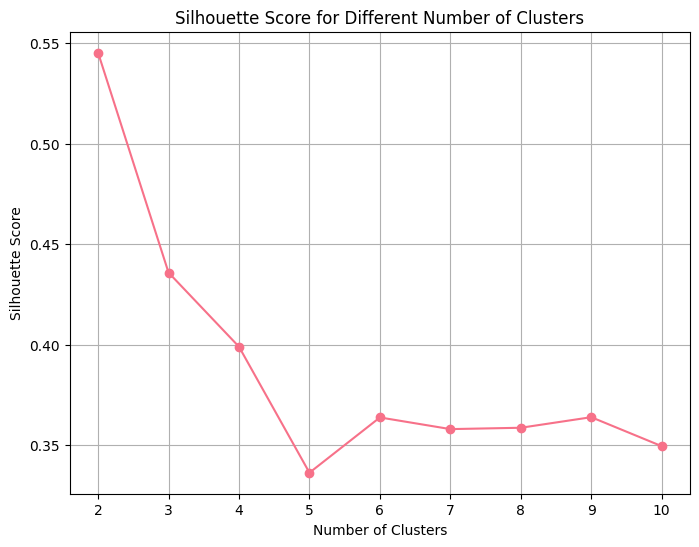

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Используем числовые столбцы для кластеризации
X = df[["temp", "RH", "wind"]]  # Пример с использованием нескольких числовых признаков

# Количество кластеров для проверки
cluster_range = range(2, 11)

# Список для хранения результатов метрики Silhouette
silhouette_scores = []

# Кластеризация для разных значений k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Вычисляем Silhouette Score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

# Находим лучшее количество кластеров по Silhouette Score
best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters based on Silhouette Score: {best_k}")

# Построим график для визуализации
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


Наилучший Silhouette Score для 2 кластеров (0.5453). Это означает, что два кластера обеспечивают наилучшую разделимость и плотность кластеризации среди тестируемых вариантов.

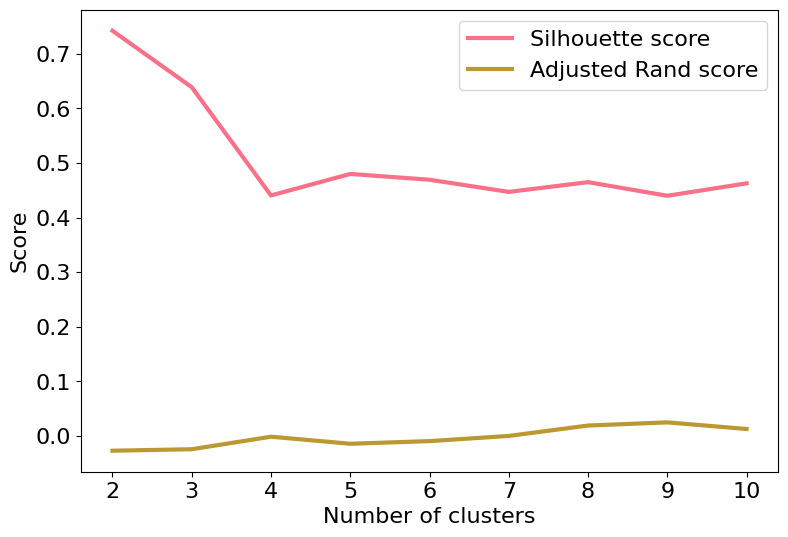

In [20]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Подготовка данных
X = df.drop("area", axis=1)  # Удаляем только целевую переменную для кластеризации
y = df["area"]  # Оставляем целевую переменную для оценки Adjusted Rand Score

# Список значений для количества кластеров
n_clusters = list(range(2, 11))  # Проверяем количество кластеров от 2 до 10

# Списки для хранения метрик
silhouette_score_values = []
adjusted_rand_score_values = []

# Для каждого количества кластеров вычисляем метрики
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X)  # Кластеризация данных

    # Рассчитываем Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_score_values.append(silhouette_avg)

    # Рассчитываем Adjusted Rand Score
    adjusted_rand_avg = adjusted_rand_score(y, labels)  # Используем реальную целевую переменную
    adjusted_rand_score_values.append(adjusted_rand_avg)

# Визуализация метрик
plt.figure(figsize=(9, 6))

# График для Silhouette Score и Adjusted Rand Score
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted Rand score')

# Настройка графика
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


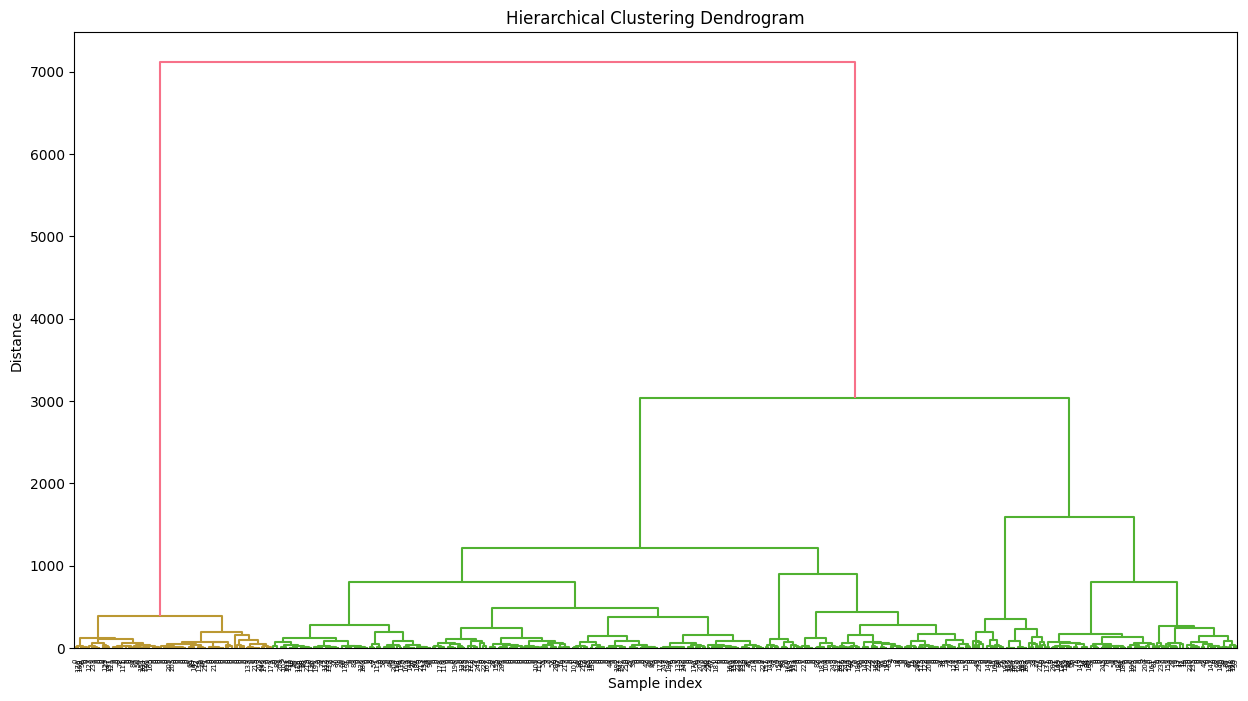

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# Используем только числовые признаки для кластеризации
X = df[["temp", "RH", "wind", "FFMC", "DMC", "DC", "ISI"]]  # Пример с использованием числовых признаков

# Преобразуем данные в массив значений
samples = X.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

# Построение дендрограммы
plt.figure(figsize=(15, 8))

dendrogram(mergings,
           labels=list(df['area']),  # Используем значения из столбца 'area' как метки
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


Number of clusters: 2


<ipython-input-24-ca935ce0d7ec>:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy_noncore["temp"], xy_noncore["RH"], s=10, color=col, edgecolor='k', marker='x')


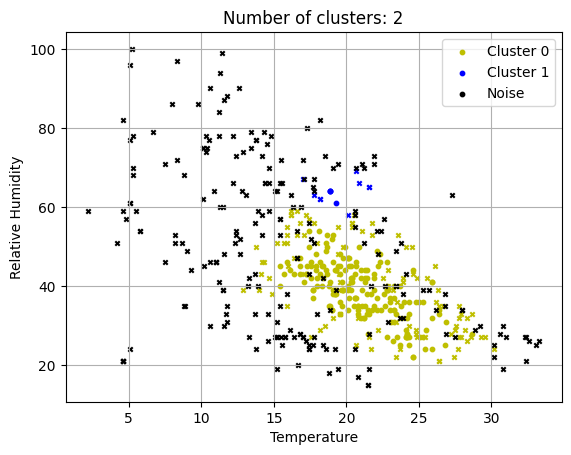

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Используем числовые столбцы для кластеризации
X = df[["temp", "RH", "wind"]]  # Пример с использованием нескольких числовых признаков

# Стандартизируем данные для лучшего выполнения DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем DBSCAN
db = DBSCAN(eps=0.5, min_samples=12).fit(X_scaled)

# Получаем метки кластеров
labels = db.labels_

# Массив для пометки ядерных точек
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Количество кластеров (без учета шума)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Визуализируем результаты
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'c', 'm', 'k']

print(f"Number of clusters: {n_clusters_}")

# Применяем цвета и метки для каждого кластера
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Черный для шума
        col = 'k'

    # Массив для выборки точек данного кластера
    class_member_mask = (labels == k)

    # Точки, являющиеся ядром кластера
    xy_core = X[class_member_mask & core_samples_mask]
    plt.scatter(xy_core["temp"], xy_core["RH"], s=10, color=col, label=f"Cluster {k}" if k != -1 else "Noise")

    # Точки, являющиеся неядровыми точками
    xy_noncore = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy_noncore["temp"], xy_noncore["RH"], s=10, color=col, edgecolor='k', marker='x')

plt.title(f'Number of clusters: {n_clusters_}')
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity')
plt.legend()
plt.grid(True)
plt.show()


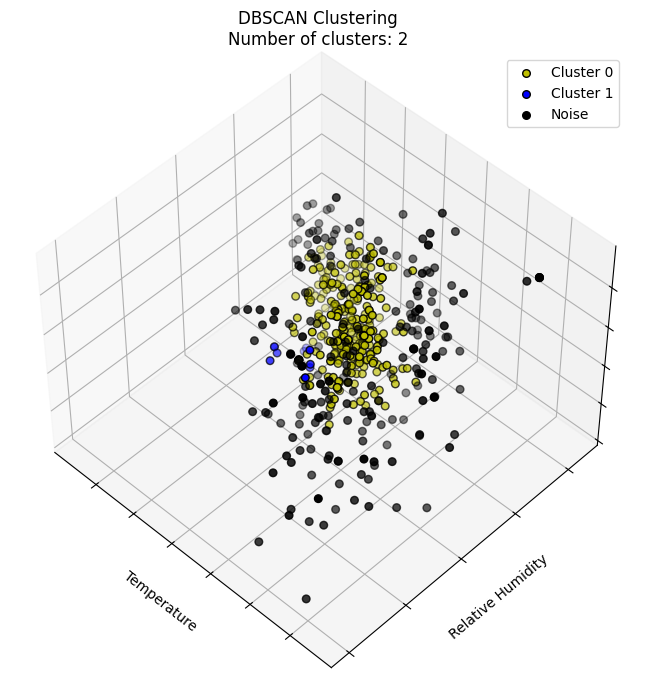

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Используем числовые столбцы для кластеризации
X = df[["temp", "RH", "wind"]]  # Пример с использованием нескольких числовых признаков

# Стандартизируем данные для лучшего выполнения DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем DBSCAN
db = DBSCAN(eps=0.5, min_samples=12).fit(X_scaled)

# Получаем метки кластеров
labels = db.labels_

# Массив для пометки ядерных точек
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Количество кластеров (без учета шума)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Визуализируем результат в 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

# Используем разные цвета для каждого кластера
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'c', 'm', 'k']  # Цвета для кластеров

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Черный для шума
        col = 'k'

    # Выбираем точки для текущего кластера
    class_member_mask = (labels == k)

    # Точки, являющиеся ядром
    xy_core = X[class_member_mask & core_samples_mask]
    ax.scatter(xy_core["temp"], xy_core["RH"], xy_core["wind"], c=col, edgecolor="k", s=30, label=f"Cluster {k}" if k != -1 else "Noise")

    # Точки, являющиеся неядровыми точками
    xy_noncore = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy_noncore["temp"], xy_noncore["RH"], xy_noncore["wind"], c=col, edgecolor="k", s=30)

# Настроим подписи осей
ax.set_xlabel("Temperature")
ax.set_ylabel("Relative Humidity")
ax.set_zlabel("Wind Speed")
ax.set_title(f"DBSCAN Clustering\nNumber of clusters: {n_clusters_}")

# Убираем метки с осей
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.legend()
plt.show()


In [26]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Подсчет Silhouette Coefficient
# Важно, что DBSCAN может включать точки с меткой -1 (шум), и их нужно исключить из оценки
labels_filtered = labels[labels != -1]  # Исключаем шум
X_filtered = X[labels != -1]  # Исключаем шум из данных

if len(labels_filtered) > 1:  # Проверка, что кластеров больше одного
    sc = metrics.silhouette_score(X_filtered, labels_filtered)
    print("Silhouette Coefficient: %0.2f" % sc)
else:
    print("Silhouette Coefficient: Cannot be computed with one cluster or no clusters")

# Подсчет Adjusted Rand Index (для этого нужно наличие целевой переменной y)
try:
    ari = adjusted_rand_score(y, labels)
    print("Adjusted Rand Index: %0.2f" % ari)
except NameError:
    print("Adjusted Rand Index: No ground truth labels available")


Silhouette Coefficient: 0.49
Adjusted Rand Index: -0.01
